# **Dataset Analysis**

## DDICorpus

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [ ]:
def parse_ddi_corpus(xml_file):
    tree = ET.parse(xml_file)
    root = tree.getroot()

    sentences = []
    entities = []

    for sentence in root.iter('sentence'):
        sent_text = sentence.attrib['text']
        sent_entities = []

        for entity in sentence.iter('entity'):
            ent_text = entity.attrib['text']
            ent_type = entity.attrib['type']
                        
            sent_entities.append({
                'text': ent_text,
                'type': ent_type,
            })

        sentences.append(sent_text)
        entities.append(sent_entities)

    return sentences, entities

In [ ]:
def process_all_files_in_directory(directory):
    all_results = []
    # Iterate through all XML files in the directory
    for filename in os.listdir(directory):
        if filename.endswith(".xml"):
            file_path = os.path.join(directory, filename)
            
            sentences, entities = parse_ddi_corpus(file_path)

            all_results.append({'sentences': sentences, 'entities': entities})     
    
    return all_results

In [4]:
processed_files_1 = process_all_files_in_directory("../DDICorpus/Train/DrugBank")
processed_files_2 = process_all_files_in_directory("../DDICorpus/Train/MedLine")

In [5]:
print(processed_files_1[:2])

[{'sentences': ['No drug, nutritional supplement, food or herb interactions have yet been reported.'], 'entities': [[]]}, {'sentences': ['No formal drug/drug interaction studies with Plenaxis were performed.', 'Cytochrome P-450 is not known to be involved in the metabolism of Plenaxis.', 'Plenaxis is highly bound to plasma proteins (96 to 99%).', 'Laboratory Tests Response to Plenaxis should be monitored by measuring serum total testosterone concentrations just prior to administration on Day 29 and every 8 weeks thereafter.', 'Serum transaminase levels should be obtained before starting treatment with Plenaxis and periodically during treatment.', 'Periodic measurement of serum PSA levels may also be considered.'], 'entities': [[{'text': 'Plenaxis', 'type': 'brand'}], [{'text': 'Plenaxis', 'type': 'brand'}], [{'text': 'Plenaxis', 'type': 'brand'}], [{'text': 'Plenaxis', 'type': 'brand'}, {'text': 'testosterone', 'type': 'drug'}], [{'text': 'Plenaxis', 'type': 'brand'}], []]}]


In [6]:
print(processed_files_2[:2])

[{'sentences': ['The fluoroquinolones for urinary tract infections: a review.\r\n', 'The fluoroquinolones are a rapidly growing class of antibiotics with a broad spectrum of activity against gram-negative and some gram-positive aerobic bacteria. ', 'These agents, including norfloxacin, ciprofloxacin, ofloxacin, enoxacin, and lomefloxacin, have been extensively studied and have demonstrated efficacy and safety profiles comparable to those of other traditional agents for the treatment of complicated or uncomplicated urinary tract infections and prostatitis. ', 'Advantages offered by this class of antibiotics include optimal pharmacokinetics, effectiveness against multidrug-resistant organisms, and oral administration even when parenteral antibiotics are generally used. ', 'The fluoroquinolones are also extensively used in urologic surgery.'], 'entities': [[{'text': 'fluoroquinolones', 'type': 'group'}], [{'text': 'fluoroquinolones', 'type': 'group'}, {'text': 'antibiotics', 'type': 'grou

In [7]:
def convert_to_dataframe(processed_files):
    data = []
    
    for entry in processed_files:
        sentences = entry["sentences"]
        entities = entry["entities"]
        
        for i, sentence in enumerate(sentences):
            entity_list = entities[i] if i < len(entities) else []
            
            entity_texts = [e["text"] for e in entity_list]
            entity_types = [e["type"] for e in entity_list]
            
            row = {"sentence": sentence}
            
            for idx, (text, type_) in enumerate(zip(entity_texts, entity_types)):
                row[f"entity_{idx+1}"] = text
                row[f"entity_{idx+1}_type"] = type_
            
            data.append(row)
    
    return pd.DataFrame(data)


In [8]:
df_1 = convert_to_dataframe(processed_files_1)
df_2 = convert_to_dataframe(processed_files_2)
df_1

,sentence,entity_1,entity_1_type,entity_2,entity_2_type,entity_3,entity_3_type,entity_4,entity_4_type,entity_5,...,entity_51,entity_51_type,entity_52,entity_52_type,entity_53,entity_53_type,entity_54,entity_54_type,entity_55,entity_55_type
0,"No drug, nutritional supplement, food or herb ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No formal drug/drug interaction studies with P...,Plenaxis,brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cytochrome P-450 is not known to be involved i...,Plenaxis,brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Plenaxis is highly bound to plasma proteins (9...,Plenaxis,brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Laboratory Tests Response to Plenaxis should b...,Plenaxis,brand,testosterone,drug,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5670,Drugs with a Narrow Therapeutic Index Digoxin:...,Digoxin,drug,Sonata,brand,digoxin,drug,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5671,Warfarin: Multiple oral doses of Sonata (20 mg...,Warfarin,drug,Sonata,brand,warfarin,drug,warfarin,drug,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5672,Drugs That Alter Renal Excretion Ibuprofen: Ib...,Ibuprofen,drug,Ibuprofen,drug,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5673,There was no apparent pharmacokinetic interact...,zaleplon,drug,ibuprofen,drug,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_2

,sentence,entity_1,entity_1_type,entity_2,entity_2_type,entity_3,entity_3_type,entity_4,entity_4_type,entity_5,...,entity_10,entity_10_type,entity_11,entity_11_type,entity_12,entity_12_type,entity_13,entity_13_type,entity_14,entity_14_type
0,The fluoroquinolones for urinary tract infecti...,fluoroquinolones,group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The fluoroquinolones are a rapidly growing cla...,fluoroquinolones,group,antibiotics,group,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"These agents, including norfloxacin, ciproflox...",norfloxacin,drug,ciprofloxacin,drug,ofloxacin,drug,enoxacin,drug,lomefloxacin,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Advantages offered by this class of antibiotic...,antibiotics,group,antibiotics,drug,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The fluoroquinolones are also extensively used...,fluoroquinolones,group,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296,"When taken concurrently with ethanol, a pharma...",ethanol,drug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,In addition to this pharmacological interactio...,temazepam,drug,benzodiazepine,group,ethanol,drug,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1298,"Optimal conditions, kinetics, equilibrium, and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1299,The results raise the possibility that the eth...,alcohol,drug,"3-hydroxy-1,4-benzodiazepine",group,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_train = pd.concat([df_1, df_2], ignore_index=True)
df_train

,sentence,entity_1,entity_1_type,entity_2,entity_2_type,entity_3,entity_3_type,entity_4,entity_4_type,entity_5,...,entity_51,entity_51_type,entity_52,entity_52_type,entity_53,entity_53_type,entity_54,entity_54_type,entity_55,entity_55_type
0,"No drug, nutritional supplement, food or herb ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,No formal drug/drug interaction studies with P...,Plenaxis,brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Cytochrome P-450 is not known to be involved i...,Plenaxis,brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Plenaxis is highly bound to plasma proteins (9...,Plenaxis,brand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Laboratory Tests Response to Plenaxis should b...,Plenaxis,brand,testosterone,drug,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6971,"When taken concurrently with ethanol, a pharma...",ethanol,drug,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6972,In addition to this pharmacological interactio...,temazepam,drug,benzodiazepine,group,ethanol,drug,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6973,"Optimal conditions, kinetics, equilibrium, and...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6974,The results raise the possibility that the eth...,alcohol,drug,"3-hydroxy-1,4-benzodiazepine",group,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Word Distribution

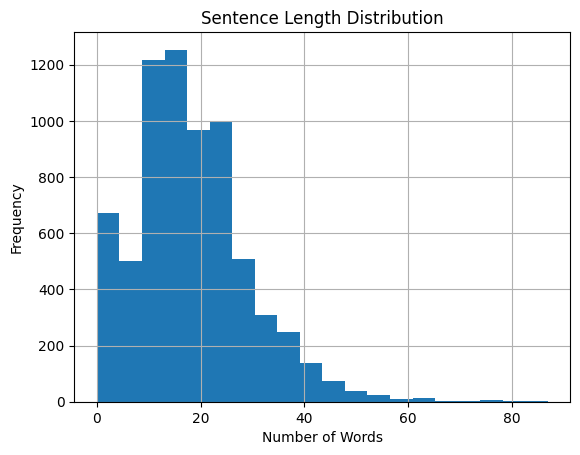

In [ ]:
df_train['sentence_length'] = df_train['sentence'].apply(lambda x: len(x.split()))
df_train['sentence_length'].hist(bins=20)
plt.title("Sentence Length Distribution")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

Entity Distribution

In [17]:
entity_columns = [col for col in df_train.columns if "_type" in col]
entity_counts = df_train[entity_columns].melt(value_name="entity_type")["entity_type"].value_counts()
print(entity_counts)

entity_type
drug      9432
group     3427
brand     1437
drug_n     505
Name: count, dtype: int64


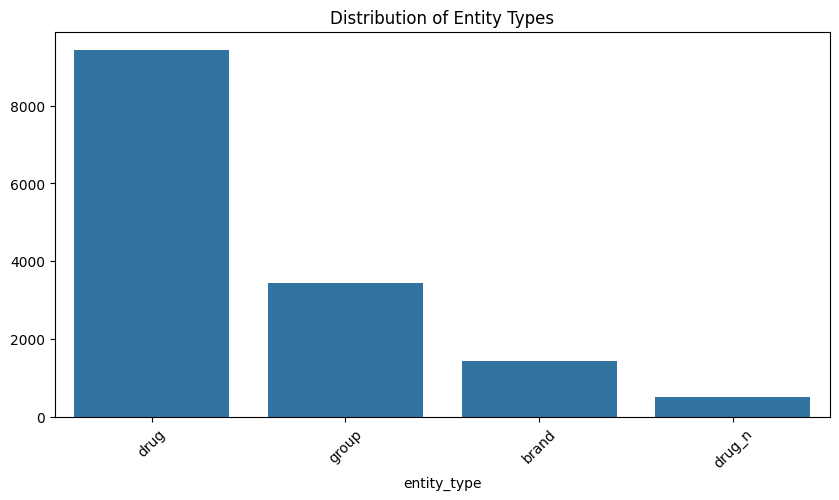

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(x=entity_counts.index, y=entity_counts.values)
plt.xticks(rotation=45)
plt.title("Distribution of Entity Types")
plt.show()


Distribution of number of entities per setence

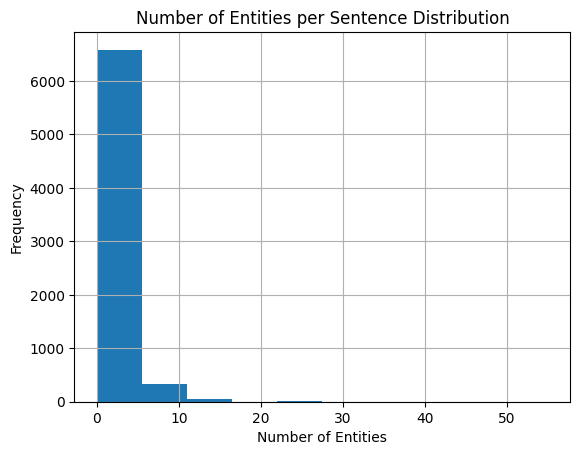

In [ ]:
df_train["num_entities"] = df_train[entity_columns].notnull().sum(axis=1)
df_train["num_entities"].hist()
plt.title("Number of Entities per Sentence Distribution")
plt.xlabel("Number of Entities")
plt.ylabel("Frequency")

plt.show()

Number of Entities per Sentence


In [ ]:
df_train["num_entities"].value_counts()

num_entities
1     1771
2     1587
0     1416
3      998
4      548
5      266
6      164
7       61
8       45
9       34
10      19
11      13
12      11
13      10
14      10
16       5
15       5
17       2
18       2
25       2
24       1
55       1
27       1
46       1
45       1
22       1
34       1
Name: count, dtype: int64

In [18]:
# Function to parse DDI relations from XML files in a given directory
def parse_ddi_relations_from_directory(directory):
    drug_pairs = []
    for file_name in os.listdir(directory):
        if file_name.endswith('.xml'):
            file_path = os.path.join(directory, file_name)
            drug_pairs.extend(parse_ddi_relations(file_path))
    return drug_pairs

# Function to parse DDI relations from a single file
def parse_ddi_relations(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    relations = []

    # Map entity IDs to drug names
    entity_id_to_name = {entity.attrib.get('id'): entity.attrib.get('text') for entity in root.findall(".//entity")}

    # Parse pairs and retrieve entity names
    for pair in root.findall(".//pair"):
        if pair.attrib.get('ddi') == 'true':
            relation = {
                'e1': pair.attrib.get('e1'),
                'e2': pair.attrib.get('e2'),
                'ddi': pair.attrib.get('ddi'),
                'e1_name': entity_id_to_name.get(pair.attrib.get('e1')),
                'e2_name': entity_id_to_name.get(pair.attrib.get('e2')),
                'type': pair.attrib.get('type')
            }
            relations.append(relation)
        else:
            relation = {
                'e1': pair.attrib.get('e1'),
                'e2': pair.attrib.get('e2'),
                'ddi': pair.attrib.get('ddi'),
                'e1_name': entity_id_to_name.get(pair.attrib.get('e1')),
                'e2_name': entity_id_to_name.get(pair.attrib.get('e2'))
            }
            relations.append(relation)
    
    return relations

# Directories for training and testing datasets
train_dirs = ['../DDICorpus/Train/DrugBank', '../DDICorpus/Train/MedLine']
test_dirs = ['../DDICorpus/Test/Test for DDI Extraction task/DrugBank', '../DDICorpus/Test/Test for DDI Extraction task/MedLine']

# Extract drug pairs from training and testing directories
all_drug_pairs = []
all_drug_pairs_test = []

for directory in train_dirs:
    all_drug_pairs.extend(parse_ddi_relations_from_directory(directory))

for directory in test_dirs:
    all_drug_pairs_test.extend(parse_ddi_relations_from_directory(directory))

Training Drug Pairs

In [29]:
print(f"Training drug pairs: {len(all_drug_pairs)}")
# print(all_drug_pairs)

Training drug pairs: 27792


Testing Drug Pairs

In [22]:
print(f"Testing drug pairs: {len(all_drug_pairs_test)}")
print(all_drug_pairs_test)

Testing drug pairs: 5716
[{'e1': 'DDI-DrugBank.d610.s0.e0', 'e2': 'DDI-DrugBank.d610.s0.e1', 'ddi': 'false', 'e1_name': 'abacavir', 'e2_name': 'lamivudine'}, {'e1': 'DDI-DrugBank.d610.s0.e0', 'e2': 'DDI-DrugBank.d610.s0.e2', 'ddi': 'false', 'e1_name': 'abacavir', 'e2_name': 'zidovudine'}, {'e1': 'DDI-DrugBank.d610.s0.e0', 'e2': 'DDI-DrugBank.d610.s0.e3', 'ddi': 'false', 'e1_name': 'abacavir', 'e2_name': 'lamivudine'}, {'e1': 'DDI-DrugBank.d610.s0.e0', 'e2': 'DDI-DrugBank.d610.s0.e4', 'ddi': 'false', 'e1_name': 'abacavir', 'e2_name': 'zidovudine'}, {'e1': 'DDI-DrugBank.d610.s0.e1', 'e2': 'DDI-DrugBank.d610.s0.e2', 'ddi': 'false', 'e1_name': 'lamivudine', 'e2_name': 'zidovudine'}, {'e1': 'DDI-DrugBank.d610.s0.e1', 'e2': 'DDI-DrugBank.d610.s0.e3', 'ddi': 'false', 'e1_name': 'lamivudine', 'e2_name': 'lamivudine'}, {'e1': 'DDI-DrugBank.d610.s0.e1', 'e2': 'DDI-DrugBank.d610.s0.e4', 'ddi': 'false', 'e1_name': 'lamivudine', 'e2_name': 'zidovudine'}, {'e1': 'DDI-DrugBank.d610.s0.e2', 'e2': 'DDI

In [23]:
drug_pairs_df = pd.DataFrame(all_drug_pairs)

drug_pairs_df = drug_pairs_df[['e1_name', 'e2_name', 'ddi', 'type']]
drug_pairs_df.columns = ['Drug1', 'Drug2', 'Interacting', 'Type']

drug_pairs_df['Interacting'] = drug_pairs_df['Interacting'].apply(lambda x: x.lower() == 'true')
drug_pairs_df

,Drug1,Drug2,Interacting,Type
0,Plenaxis,testosterone,False,NaN
1,MTX,NSAIDs,False,NaN
2,MTX,corticosteroids,False,NaN
3,MTX,TNF blocking agents,False,NaN
4,MTX,abatacept,False,NaN
...,...,...,...,...
27787,anxiolytic,hypnotic drugs,False,NaN
27788,temazepam,benzodiazepine,False,NaN
27789,temazepam,ethanol,True,mechanism
27790,benzodiazepine,ethanol,False,NaN


Count Each type of interaction

In [ ]:
drug_pairs_df['Type'].value_counts()

Type
effect       1687
mechanism    1319
advise        826
int           188
Name: count, dtype: int64